In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("../")
from definitions import ROOT_DIR

# EDA - Trimestral data

## 1. Load data and generate merged dataset

In [2]:
df = pd.read_parquet('../data_files/ingresos_clean.parquet')

df_aux = pd.read_parquet('../data_files/totales_vmd_clean.parquet', columns=(['Periodo', 'Mbps (Media de bajada)']))
df = pd.merge(df, df_aux, how='left', on=['Periodo'])

df_aux = pd.read_parquet('../data_files/accesos_totales_tecnologia_clean.parquet', columns=(['Periodo', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']))
df = pd.merge(df, df_aux, how='left', on=['Periodo'])

df_aux = pd.read_parquet('../data_files/penetracion_totales_clean.parquet', columns=(['Periodo', 'Accesos por cada 100 hogares', 'Accesos por cada 100 hab']))
df = pd.merge(df, df_aux, how='left', on=['Periodo'])

df.sort_values(by=['Periodo'], inplace=True)
print('Dataset shape:', df.shape)
df.info()



Dataset shape: (42, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 41 to 0
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         42 non-null     int64  
 1   Año                           42 non-null     int64  
 2   Trimestre                     42 non-null     int64  
 3   Ingresos (miles de pesos)     42 non-null     float64
 4   Periodo                       42 non-null     object 
 5   Mbps (Media de bajada)        42 non-null     float64
 6   ADSL                          42 non-null     int64  
 7   Cablemodem                    42 non-null     int64  
 8   Fibra óptica                  42 non-null     int64  
 9   Wireless                      42 non-null     int64  
 10  Otros                         42 non-null     int64  
 11  Total                         42 non-null     int64  
 12  Accesos por cada 100 hogares  42 non-null     f

#### The agregated dataset has 42 rows and 10 columns, the column "Periodo" have an object data type, and have strings values. We will to change the data type to string.

In [3]:
df['Periodo'] = df['Periodo'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 41 to 0
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         42 non-null     int64  
 1   Año                           42 non-null     int64  
 2   Trimestre                     42 non-null     int64  
 3   Ingresos (miles de pesos)     42 non-null     float64
 4   Periodo                       42 non-null     string 
 5   Mbps (Media de bajada)        42 non-null     float64
 6   ADSL                          42 non-null     int64  
 7   Cablemodem                    42 non-null     int64  
 8   Fibra óptica                  42 non-null     int64  
 9   Wireless                      42 non-null     int64  
 10  Otros                         42 non-null     int64  
 11  Total                         42 non-null     int64  
 12  Accesos por cada 100 hogares  42 non-null     float64
 13  Accesos por 

## 1. Numerical Data

### Statistical analysis

In [4]:
df.describe()

,index,Año,Trimestre,Ingresos (miles de pesos),Mbps (Media de bajada),ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,42.000000,42.000000,42.000000,4.200000e+01,42.000000,4.200000e+01,4.200000e+01,4.200000e+01,42.000000,42.000000,4.200000e+01,42.000000,42.000000
mean,20.500000,2018.761905,2.452381,5.001648e+07,39.334762,2.694844e+06,4.433906e+06,1.224694e+06,304293.214286,158186.071429,8.815923e+06,63.201813,19.574600
std,12.267844,3.074756,1.130560,8.710208e+07,43.643195,1.094347e+06,1.319783e+06,1.321136e+06,203202.399993,82363.507846,1.733189e+06,9.950321,3.268665
min,0.000000,2014.000000,1.000000,2.984054e+06,3.617127,7.334910e+05,2.407330e+06,1.391870e+05,70749.000000,54300.000000,6.398398e+06,49.545821,15.050104
25%,10.250000,2016.000000,1.250000,7.055326e+06,6.038428,1.730869e+06,3.146292e+06,1.719410e+05,85390.500000,70430.000000,7.218131e+06,53.784644,16.519507
50%,20.500000,2019.000000,2.000000,2.047527e+07,18.855000,3.061623e+06,4.535507e+06,6.989465e+05,292223.000000,185221.000000,8.720658e+06,62.667764,19.395586
75%,30.750000,2021.000000,3.000000,4.485090e+07,51.370000,3.713298e+06,5.857192e+06,1.945689e+06,515434.000000,244069.500000,1.038873e+07,72.527011,22.603664
max,41.000000,2024.000000,4.000000,4.420322e+08,139.250000,3.803024e+06,6.073426e+06,4.169958e+06,598682.000000,265328.000000,1.163316e+07,78.890000,24.790000


- The year column have the stimated values, between 2014 and 2024. The quarter column have the values 1, 2, 3 and 4.
- The MBPS have values between 3.6 and 139.2, with a mean of 39.3 and a standard deviation of 43.6.
- The total accesses have values between 0.63 and 1,17 with a mean of 0.88 and a standard deviation of 0.17 (all in e7 notation).

### Correlationship between variables

In [5]:
#Correlation matrix
selected_columns = ['Ingresos (miles de pesos)', 'Mbps (Media de bajada)', 'Accesos por cada 100 hogares', 'Accesos por cada 100 hab']
df[selected_columns].corr()

,Ingresos (miles de pesos),Mbps (Media de bajada),Accesos por cada 100 hogares,Accesos por cada 100 hab
Ingresos (miles de pesos),1.000000,0.824029,0.654199,0.659418
Mbps (Media de bajada),0.824029,1.000000,0.895075,0.898108
Accesos por cada 100 hogares,0.654199,0.895075,1.000000,0.999947
Accesos por cada 100 hab,0.659418,0.898108,0.999947,1.000000


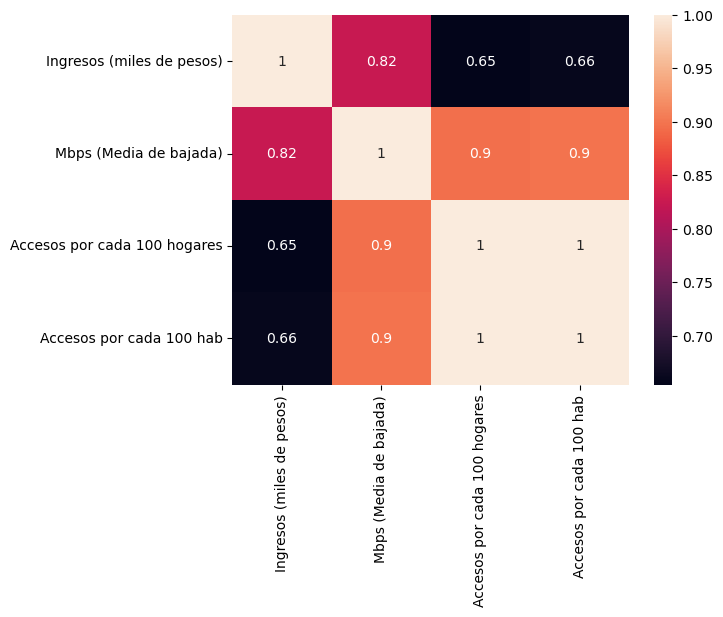

In [6]:
sns.heatmap(df[selected_columns].corr(), annot=True)
plt.show()

#### We found a high correlation between the income and the Mbps (Media de bajada), and in menor degree between the income and the Accesos por cada 100 hab and the Accesos por cada 100 hogares. The correlation between the MBPS and the Accesos por cada 100 hab and the Accesos por cada 100 hogares is very high. This means that the greater the number of accesses, the greater the amount of MBPS consumed.

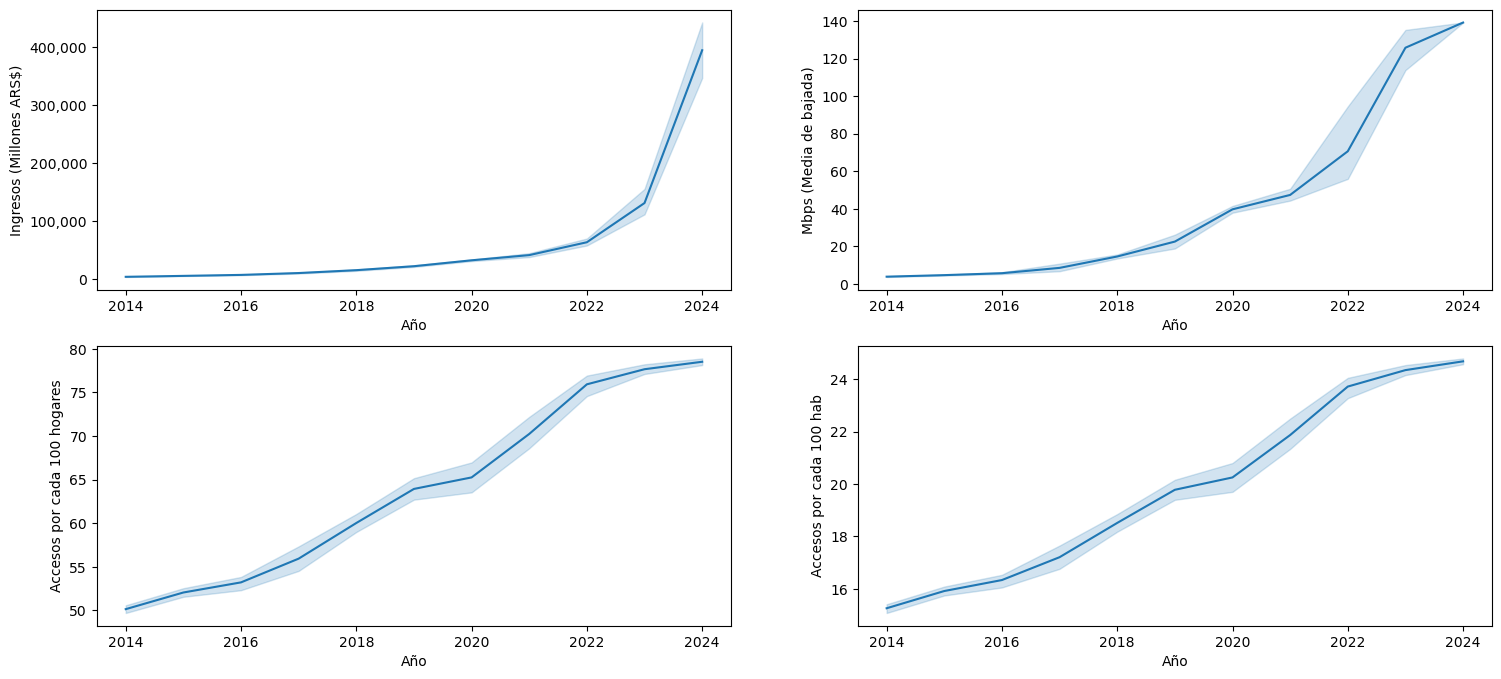

In [7]:
fig, ax = plt.subplots(2,2,figsize=(18,8))

#first plot
sns.lineplot(data=df, x=df['Año'], y=df['Ingresos (miles de pesos)']/1000, ax=ax[0,0])
ax[0,0].set(xlabel='Año', ylabel='Ingresos (Millones ARS$)')
ax[0,0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#plt.show()

#second plot
sns.lineplot(data=df, x=df['Año'], y=df['Mbps (Media de bajada)'], ax=ax[0,1])
ax[0,1].set(xlabel='Año', ylabel='Mbps (Media de bajada)')
ax[0,1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#plt.show()

#third plot
sns.lineplot(data=df, x=df['Año'], y=df['Accesos por cada 100 hogares'], ax=ax[1,0])
ax[1,0].set(xlabel='Año', ylabel='Accesos por cada 100 hogares')
ax[1,0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#fourth plot
sns.lineplot(data=df, x=df['Año'], y=df['Accesos por cada 100 hab'], ax=ax[1,1])
ax[1,1].set(xlabel='Año', ylabel='Accesos por cada 100 hab')
ax[1,1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()



#### The income growth pattern don't follow the same trend as the other variables. 

## Save dataset to parquet file


In [8]:
df=df.reset_index()
df.to_parquet(ROOT_DIR + '/data_files/trimestres_eda_clean.parquet')